In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers

import tensorflow as tf
from scikeras.wrappers import KerasRegressor

# On avge, 252 trading days a year
NUM_TRADING_DAYS = 252

# Generate random w (diff. portfolios)
NUM_PORTFOLIOS = 10000

# Our portfolio stocks
stocks = ['AAPL', 'NVDA', 'MAR', 'LMT', 'BA']

# Historical data - define START, END dates
start_date = '2010-01-01'
end_date = '2023-10-01'

In [3]:
merged = pd.read_excel("merged.xlsx", index_col=0)

In [4]:
stock_dict = {}
for stock in stocks:
    new_df = merged.filter(regex=f'{stock}_')
    stock_dict[f"{stock}"] = new_df

In [5]:
def LSTM_model(key, stock_df):
    training_list = [f"{key}_Daily_Return", f"{key}_Adj Close", f"{key}_Volume", f"{key}_Sentiment_score"]
    # return training_list
    trunc_df = stock_df.loc[:, training_list]
    stock_values = stock_df.loc[:, training_list].values
    # return stock_df

    sc = MinMaxScaler(feature_range=(0,1))
    stock_values = sc.fit_transform(stock_values)

    X = []
    y = []
    length = len(stock_values)
    sequence_length = 60

    for i in range(length - sequence_length):
        X.append(stock_values[i:i + sequence_length])
        y.append(stock_values[i + sequence_length])

    X, y = np.array(X), np.array(y)

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # return y_test.shape, X_test.shape

    model = Sequential()
    model.add(LSTM(128, input_shape=(sequence_length, 4)))
    # Dense(4) because we are predicting 4 features
    model.add(Dense(4))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train,y_train, epochs=50, batch_size=100, verbose=0)

    y_pred = model.predict(X_test)

    # only interested in adj close
    y_test_slice = y_test[:,1] #MinMaxScaled
    y_pred_slice = y_pred[:,1] #MinMaxScaled

    y_pred = sc.inverse_transform(y_pred)
    return history, np.sqrt(mean_squared_error(y_test_slice, y_pred_slice))




2023-11-05 00:25:08.234887: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-05 00:25:08.234911: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-05 00:25:08.234917: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-05 00:25:08.234981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-05 00:25:08.235015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-11-05 00:25:08.943352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:09.053785: I t

22/22 [==============================] - 0s 5ms/step


2023-11-05 00:25:33.023806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:33.059980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


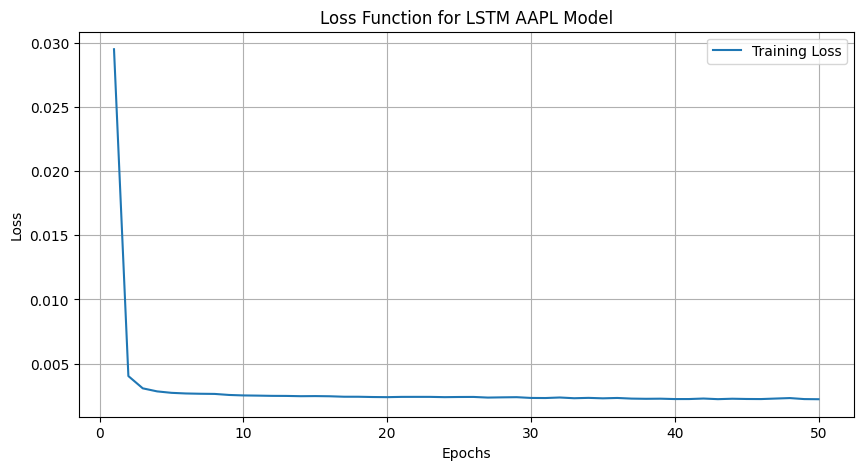

AAPL mse: 0.026977560745284353


2023-11-05 00:25:33.910844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:34.011229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:34.083459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 4ms/step


2023-11-05 00:25:57.492433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:57.527130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


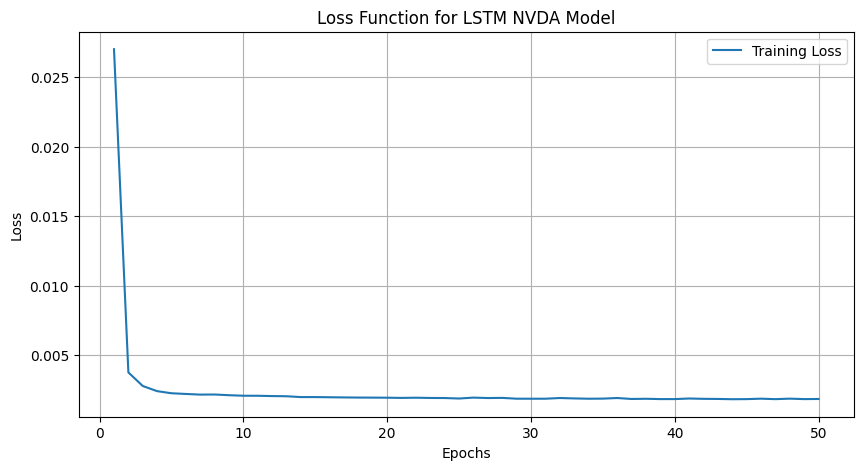

NVDA mse: 0.02846630327137939


2023-11-05 00:25:58.325563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:58.426902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:25:58.498405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 4ms/step


2023-11-05 00:26:21.721727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:21.755159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


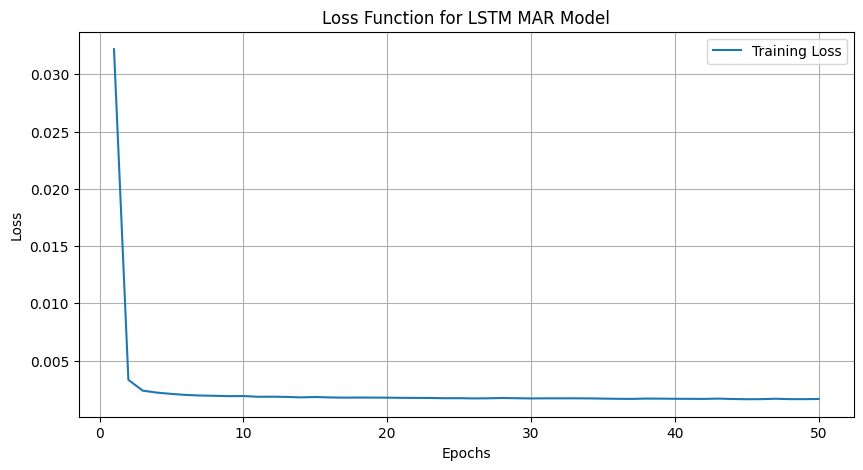

MAR mse: 0.02215795146627863


2023-11-05 00:26:22.449509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:22.548886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:22.620414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 4ms/step


2023-11-05 00:26:45.035892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:45.071829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


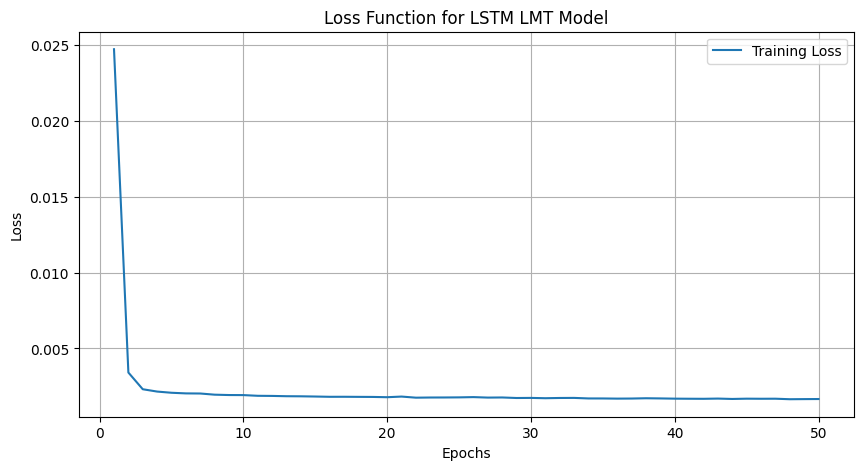

LMT mse: 0.01770581945978131


2023-11-05 00:26:45.834566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:45.938141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:26:46.024982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 4ms/step


2023-11-05 00:27:09.715807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-05 00:27:09.749161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


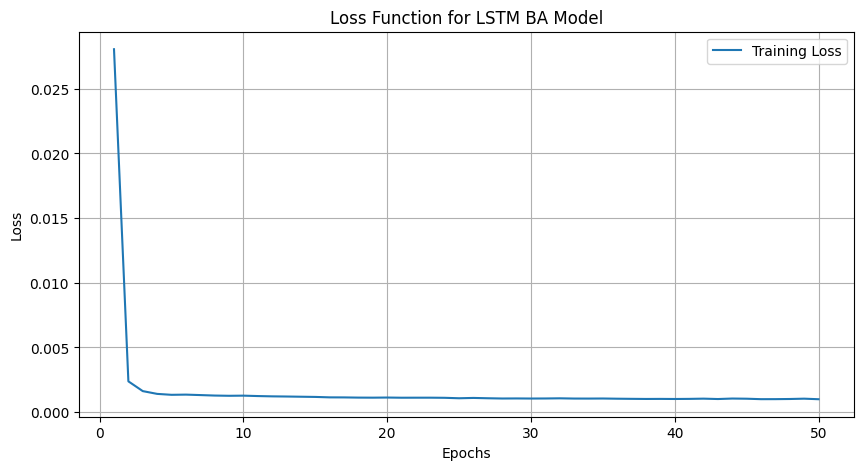

BA mse: 0.01589479431127382


In [6]:
for key in stock_dict.keys():
    stock_df = stock_dict[key]
    history, mse = LSTM_model(key, stock_df)

    training_loss = history.history['loss']
    # validation_loss = history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)

    # Plot the loss function
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, training_loss, label='Training Loss')
    plt.title(f'Loss Function for LSTM {key} Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{key} mse: {mse}")
